In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import pickle # saving and loading trained model
from os import path
import tensorflow as tf 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing required libraries for normalizing data
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier


from keras.models import Model
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json

from keras.layers import Dense # importing dense layer
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Input


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from keras.utils import plot_model
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nsl-kdd/bin_data_train.csv
/kaggle/input/nsl-kdd/bin_data_test.csv
/kaggle/input/nsl-kdd/multi_data_test.csv
/kaggle/input/nsl-kdd/multi_data_train.csv


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold

# Feature Extraction

In [3]:
bin_data  = pd.read_csv('/kaggle/input/nsl-kdd/bin_data_train.csv')
bin_data_test = pd.read_csv('/kaggle/input/nsl-kdd/bin_data_test.csv')

In [4]:
bin_data.drop(columns=bin_data.columns[0], axis=1,  inplace=True)
bin_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,abnormal.1,normal.1,label
0,-0.11025,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.639535,-0.624874,-0.387635,-0.376389,1,0,1,0,1,normal
1,-0.11025,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,1.608750,1.618946,-0.387635,-0.376389,0,1,0,1,0,abnormal
2,-0.11025,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.572087,-0.602436,-0.387635,-0.345086,1,0,1,0,1,normal
3,-0.11025,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.639535,-0.624874,-0.387635,-0.376389,1,0,1,0,1,normal
4,-0.11025,tcp,private,REJ,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.639535,-0.624874,2.874397,2.753901,0,1,0,1,0,abnormal


In [5]:
bin_data_test.drop(columns=bin_data_test.columns[0], axis=1,  inplace=True)
bin_data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,abnormal.1,normal.1,label
0,-0.155538,tcp,private,REJ,-0.021989,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.358127,-0.352758,1.980007,1.929318,1,1,0,1,0,abnormal
1,-0.154116,tcp,ftp_data,SF,0.005472,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.358127,-0.352758,-0.602670,-0.565432,0,0,1,0,1,normal
2,-0.155538,icmp,eco_i,SF,-0.021946,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.358127,-0.352758,-0.602670,-0.565432,1,1,0,1,0,abnormal
3,-0.154827,tcp,telnet,RSTO,-0.021989,-0.096191,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.358127,-0.352758,1.540952,1.205841,1,1,0,1,0,abnormal
4,-0.155538,tcp,http,SF,-0.021424,0.587149,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.321515,-0.352758,-0.602670,-0.565432,0,0,1,0,1,normal


### One-Hot Encodings

In [6]:
cat_col = ['protocol_type','service','flag']
categorical = bin_data[cat_col]
categorical.head()
     

,protocol_type,service,flag
0,udp,other,SF
1,tcp,private,S0
2,tcp,http,SF
3,tcp,http,SF
4,tcp,private,REJ


In [7]:
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()
     

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
bin_data.drop(columns=bin_data.columns[44:46], axis=1,  inplace=True)
numeric_col = bin_data.select_dtypes(include='number').columns
numeric_col

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion', 'abnormal', 'normal'],
      dtype='object')

In [9]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
numeric_bin_data = bin_data[numeric_col]
numeric_bin_data['intrusion'] = bin_data['intrusion']
     

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# finding the attributes which have more than 0.4 correlation with encoded attack label attribute 
corr= numeric_bin_data.corr(method='spearman')
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.4]
highest_corr.sort_values(ascending=True)

dst_host_count              0.400372
count                       0.557458
dst_host_diff_srv_rate      0.580852
dst_host_srv_serror_rate    0.598815
srv_serror_rate             0.629810
dst_host_serror_rate        0.637504
dst_host_same_srv_rate      0.651091
serror_rate                 0.655196
diff_srv_rate               0.676862
dst_host_srv_count          0.686379
logged_in                   0.690181
src_bytes                   0.710716
same_srv_rate               0.734785
dst_bytes                   0.751908
intrusion                   1.000000
abnormal                    1.000000
normal                      1.000000
Name: intrusion, dtype: float64

In [11]:
numeric_bin_data = bin_data[['dst_host_count','count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]
     


In [12]:
numeric_bin_data_test = bin_data_test[['dst_host_count','count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]
     


In [13]:
numeric_bin_data.head()

,dst_host_count,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate
0,0.734337,-0.620987,-0.631933,-0.637213,-0.639535,-0.624874,-0.809267,-1.161035,-1.035693,-1.321420
1,0.734337,0.339641,1.605095,1.602655,1.608750,1.618946,-0.809267,-0.938292,-0.809862,-1.389660
2,-1.533667,-0.690851,-0.184527,-0.189239,-0.572087,-0.602436,1.235686,1.066393,1.258746,0.771288
3,0.734337,-0.472526,-0.631933,-0.637213,-0.639535,-0.624874,1.235686,1.066393,1.258746,0.771288
4,0.734337,0.322176,-0.631933,-0.637213,-0.639535,-0.624874,-0.809267,-1.005115,-0.873095,-1.139445


In [14]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_bin_data = numeric_bin_data.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data = numeric_bin_data.join(bin_data[['intrusion','abnormal','normal','label']])

In [15]:
numeric_bin_test = numeric_bin_data_test.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data_test = numeric_bin_test.join(bin_data_test[['intrusion','abnormal','normal','label']])

In [16]:
for col in bin_data.columns:
    print(col)

dst_host_count
count
srv_serror_rate
serror_rate
dst_host_serror_rate
dst_host_srv_serror_rate
logged_in
dst_host_same_srv_rate
dst_host_srv_count
same_srv_rate
protocol_type_icmp
protocol_type_tcp
protocol_type_udp
service_IRC
service_X11
service_Z39_50
service_aol
service_auth
service_bgp
service_courier
service_csnet_ns
service_ctf
service_daytime
service_discard
service_domain
service_domain_u
service_echo
service_eco_i
service_ecr_i
service_efs
service_exec
service_finger
service_ftp
service_ftp_data
service_gopher
service_harvest
service_hostnames
service_http
service_http_2784
service_http_443
service_http_8001
service_imap4
service_iso_tsap
service_klogin
service_kshell
service_ldap
service_link
service_login
service_mtp
service_name
service_netbios_dgm
service_netbios_ns
service_netbios_ssn
service_netstat
service_nnsp
service_nntp
service_ntp_u
service_other
service_pm_dump
service_pop_2
service_pop_3
service_printer
service_private
service_red_i
service_remote_job
service_rj

## For Multi Data

In [17]:
multi_data  = pd.read_csv('/kaggle/input/nsl-kdd/multi_data_train.csv', index_col = False)
multi_data_test = pd.read_csv('/kaggle/input/nsl-kdd/multi_data_test.csv')

In [18]:
multi_data.drop(columns=multi_data.columns[0], axis=1,  inplace=True)
multi_data

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.620987,-0.809267,-0.631933,-0.637213,-0.639535,-1.161035,-0.624874,-1.035693,-1.321420,0,...,0,1,0,4,0,0,0,0,1,normal
1,0.339641,-0.809267,1.605095,1.602655,1.608750,-0.938292,1.618946,-0.809862,-1.389660,0,...,0,0,0,0,1,0,0,0,0,Dos
2,-0.690851,1.235686,-0.184527,-0.189239,-0.572087,1.066393,-0.602436,1.258746,0.771288,0,...,0,1,0,4,0,0,0,0,1,normal
3,-0.472526,1.235686,-0.631933,-0.637213,-0.639535,1.066393,-0.624874,1.258746,0.771288,0,...,0,1,0,4,0,0,0,0,1,normal
4,0.322176,-0.809267,-0.631933,-0.637213,-0.639535,-1.005115,-0.624874,-0.873095,-1.139445,0,...,0,0,0,0,1,0,0,0,0,Dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0.872354,-0.809267,1.605095,1.602655,1.608750,-0.938292,1.618946,-0.818895,-1.184939,0,...,0,0,0,0,1,0,0,0,0,Dos
125968,-0.717050,-0.809267,-0.631933,-0.637213,-0.639535,0.977296,-0.624874,1.159381,0.771288,0,...,0,1,0,4,0,0,0,0,1,normal
125969,-0.725783,1.235686,-0.631933,-0.637213,0.979230,-0.893743,-0.624874,-0.773729,0.771288,0,...,0,1,0,4,0,0,0,0,1,normal
125970,0.523034,-0.809267,1.605095,1.602655,1.608750,-1.094212,1.618946,-0.972460,-1.366913,0,...,0,0,0,0,1,0,0,0,0,Dos


In [19]:
multi_data_x = multi_data.copy()
multi_label = pd.DataFrame(multi_data_x.label)
     

In [20]:
le2 = preprocessing.LabelEncoder()

# Binary Classification 

In [21]:

bin_data.head()

,dst_host_count,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,0.734337,-0.620987,-0.631933,-0.637213,-0.639535,-0.624874,-0.809267,-1.161035,-1.035693,-1.321420,...,0,0,0,0,1,0,1,0,1,normal
1,0.734337,0.339641,1.605095,1.602655,1.608750,1.618946,-0.809267,-0.938292,-0.809862,-1.389660,...,1,0,0,0,0,0,0,1,0,abnormal
2,-1.533667,-0.690851,-0.184527,-0.189239,-0.572087,-0.602436,1.235686,1.066393,1.258746,0.771288,...,0,0,0,0,1,0,1,0,1,normal
3,0.734337,-0.472526,-0.631933,-0.637213,-0.639535,-0.624874,1.235686,1.066393,1.258746,0.771288,...,0,0,0,0,1,0,1,0,1,normal
4,0.734337,0.322176,-0.631933,-0.637213,-0.639535,-0.624874,-0.809267,-1.005115,-0.873095,-1.139445,...,0,0,0,0,0,0,0,1,0,abnormal


# Linear Support Vector Machine Classifier

In [22]:
X = bin_data.iloc[:,0:94].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

In [23]:
# using kernel as linear 
lsvm = SGDClassifier(loss='hinge',max_iter=10000,  penalty='l2')
#lsvm = SVC(kernel='linear',gamma='auto')
lsvm.fit(X,Y) 

SGDClassifier(max_iter=10000)

In [24]:
%cd /kaggle/working/

/kaggle/working


In [25]:
filename = 'finalized_model.sav'
pickle.dump(lsvm, open(filename, 'wb'))
print("Saved model to disk")
  # loading the trained model from disk
with open(filename, 'rb') as file:
    lsvm = pickle.load(file)
print("Loaded model from disk") 

Saved model to disk
Loaded model from disk


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [27]:
y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  96.84691836281078


In [28]:
#y_pred = lsvm.predict(X_test_fin) # predicting target attribute on testing dataset
#ac = accuracy_score(y_test_fin, y_pred)*100 # calculating accuracy of predicted data
#print("LSVM-Classifier Binary Set-Accuracy is ", ac)

# Multi Layer Perceptron Classifier

In [29]:
X = bin_data.iloc[:,0:93]
Y = bin_data[['intrusion']]


In [30]:
batch_size = 50
loss_function = BinaryCrossentropy
no_classes = 100
no_epochs = 50
optimizer = tf.keras.optimizers.legacy.Adam()
verbosity = 1
num_folds = 3
SEED = 42

# let these be per-fold score containers
acc_per_fold_mlp = []
loss_per_fold_mlp = []

In [31]:
skfold = StratifiedKFold(n_splits= num_folds , shuffle=True, random_state= SEED)

In [32]:
fold_no = 1
for train, test in skfold.split(X , Y):
    x_train = X.iloc[train].values
    x_test =  X.iloc[test].to_numpy()
    
    y_train = np.array(Y.iloc[train])
    y_test = np.array(Y.iloc[test])
    
    
    
    mlp = Sequential()
    mlp.add(Dense(units=50, input_dim=x_train.shape[1], activation='relu'))
    mlp.add(Dense(1,activation='sigmoid'))
    
    mlp.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=optimizer,
                metrics=['accuracy'])
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    mlp.summary()
            
    history = mlp.fit(x_train,y_train, epochs = no_epochs, validation_split=0.2)
            
        
    scores = mlp.evaluate(x_test, y_test , verbose=0)
    print(f'Score for fold {fold_no}: {mlp.metrics_names[0]} of {scores[0]}; {mlp.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold_mlp.append(scores[1] * 100)
    loss_per_fold_mlp.append(scores[0])

    fold_no = fold_no +1
    


------------------------------------------------------------------------
Training for fold 1 ...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                4700      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,751
Trainable params: 4,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2100/2100 [==============================] - 11s 4ms/step - loss: 0.0963 - accuracy: 0.9671 - val_loss: 0.0625 - val_accuracy: 0.9765
Epoch 2/50
2100/2100 [==============================] - 7s 3ms/step - loss: 0.0626 - accuracy: 0.9779 - val_loss: 0.0553 - val_accuracy: 0.9793
Epoch 3/50
2100/2100 [==============================] - 7s 4ms/s

In [33]:
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold_mlp)} (+- {np.std(acc_per_fold_mlp)})')
print(f'> Loss: {np.mean(loss_per_fold_mlp)}')
print('------------------------------------------------------------------------')

Average scores for all folds:
> Accuracy: 98.69336088498433 (+- 0.06989820442318344)
> Loss: 0.03996030241250992
------------------------------------------------------------------------


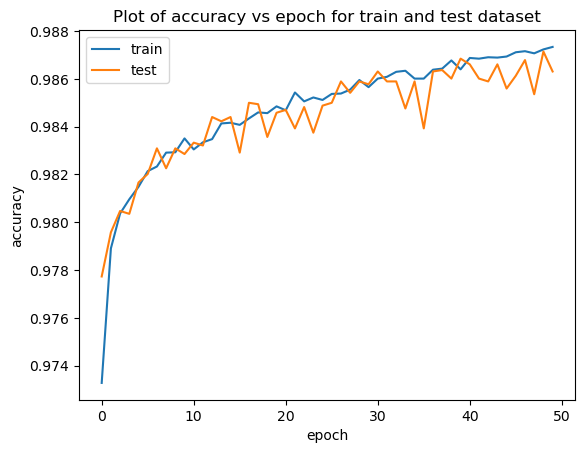

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('Plot of accuracy vs epoch : MLP')
plt.show()

# Long Short-Term Memory Classifier 

In [35]:
X = bin_data.iloc[:,0:94] 
Y = bin_data[['intrusion']]


In [36]:
batch_size = 50
loss_function = BinaryCrossentropy
no_classes = 100
no_epochs = 40
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.002)
verbosity = 1
num_folds = 3
dropout = 0.1
SEED = 42

# let these be per-fold score containers
acc_per_fold = []
loss_per_fold = []

In [37]:
skfold = StratifiedKFold(n_splits= num_folds , shuffle=True, random_state= SEED)

In [38]:
X.iloc[0]

dst_host_count          0.734337
count                  -0.620987
srv_serror_rate        -0.631933
serror_rate            -0.637213
dst_host_serror_rate   -0.639535
                          ...   
flag_S1                 0.000000
flag_S2                 0.000000
flag_S3                 0.000000
flag_SF                 1.000000
flag_SH                 0.000000
Name: 0, Length: 94, dtype: float64

### Use Stratified K Fold to improve results

In [39]:
fold_no = 1
for train, test in skfold.split(X , Y):
    X_train = X.iloc[train].values
    x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
    
    X_test =  X.iloc[test].to_numpy()
    x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
    
    y_train = np.array(Y.iloc[train])
    y_test = np.array(Y.iloc[test])
    
    
    
    lst = Sequential()
    lst.add(LSTM(50, return_sequences = True, input_dim= 94))
    lst.add(Dropout(dropout))
    lst.add(LSTM(50, return_sequences = True))
    lst.add(Dropout(dropout))
    lst.add(LSTM(50))
    lst.add(Dropout(dropout))
    
    lst.add(Dense(1,activation='sigmoid'))
    
    lst.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=optimizer,
                metrics=['accuracy'])
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    lst.summary()
            
    history = lst.fit(x_train,y_train, epochs = no_epochs, validation_split=0.2)
            
        
    scores = lst.evaluate(x_test, y_test , verbose=0)
    print(f'Score for fold {fold_no}: {lst.metrics_names[0]} of {scores[0]}; {lst.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no = fold_no +1
    


------------------------------------------------------------------------
Training for fold 1 ...
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 50)          29000     
                                                                 
 dropout (Dropout)           (None, None, 50)          0         
                                                                 
 lstm_1 (LSTM)               (None, None, 50)          20200     
                                                                 
 dropout_1 (Dropout)         (None, None, 50)          0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                       

In [40]:
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Average scores for all folds:
> Accuracy: 98.67510000864665 (+- 0.08658726438765063)
> Loss: 0.038843060533205666
------------------------------------------------------------------------


In [41]:
%cd /kaggle/working/

/kaggle/working


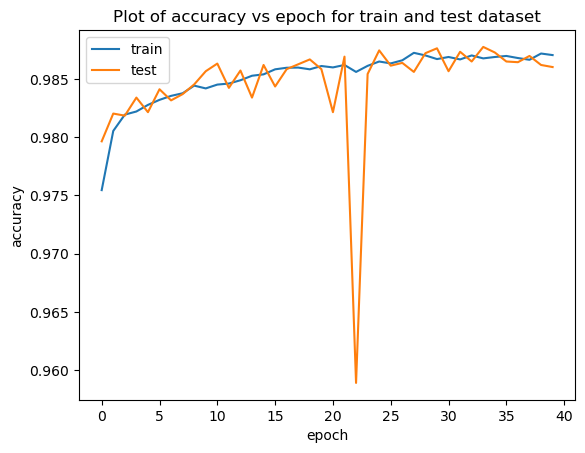

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('Plot of accuracy vs epoch : LSTM')
plt.show()

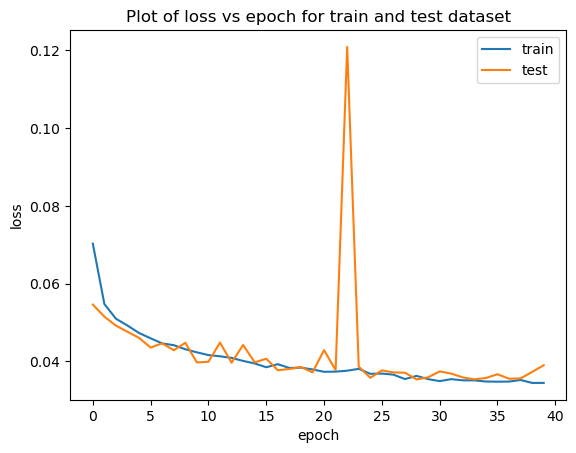

In [43]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('Plot of loss vs epoch : LSTM')
plt.show()

In [44]:
y_classes = (lst.predict(x_test)>0.5).astype('int32')

1313/1313 [==============================] - 5s 3ms/step


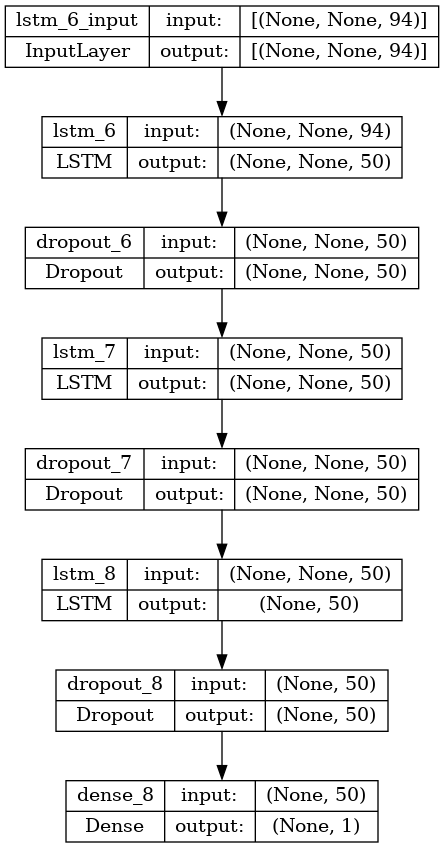

In [45]:
plot_model(lst,
        to_file="model.png",
        show_shapes=True)

In [46]:

print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9862342406557669
F1 Score -  0.9866298244050271
Precision Score -  0.9870257256230772
